In [ ]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import json
import matplotlib.pyplot as plt

# Part 1: Fetching Stock Data and Getting Returns

In [ ]:
def fetch_stock_data(ticker_list, years=5, year_end=None):
    if year_end is None:
        year_end = datetime.now().year

    end_date = datetime(year_end, 12, 31)
    start_date = end_date - timedelta(days=years * 365)

    close_data_df = pd.DataFrame()
    open_data_df = pd.DataFrame()

    for ticker in ticker_list:
        stock = yf.Ticker(ticker)
        hist_data = stock.history(period='1d', start=start_date, end=end_date)

        # Close Data
        close_data = hist_data['Close'].rename(ticker)
        close_data_df = pd.merge(close_data_df, pd.DataFrame(close_data), left_index=True, right_index=True, how='outer')

        # Open Data
        open_data = hist_data['Open'].rename(ticker)
        open_data_df = pd.merge(open_data_df, pd.DataFrame(open_data), left_index=True, right_index=True, how='outer')

    return close_data_df, open_data_df

# Fetch the data
ticker_list = [
    'AAPL', 'ABBV', 'AMGN', 'AMZN', 'AXP', 'BA', 'BIIB', 'BMY', 'CAT', 'CMCSA', 'CSCO', 'CVX', 'DD', 'DIS', 'F', 'GE', 'GILD', 'GM', 'GOOGL',
    'GS', 'HD', 'HON', 'IBM', 'INTC', 'JCI', 'JNJ', 'JPM', 'KO', 'MCD', 'META', 'MMM', 'MRK', 'MSFT', 'PEP', 'PFE', 'PG', 'T', 'TSLA', 'UNH', 'V',
    'VZ', 'WMT', 'XOM'
]

years = 5
year_end = 2022

close, open = fetch_stock_data(ticker_list, years, year_end)
close.head()

,AAPL,ABBV,AMGN,AMZN,AXP,BA,BIIB,BMY,CAT,CMCSA,...,PEP,PFE,PG,T,TSLA,UNH,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00-05:00,40.722878,74.280716,147.573822,59.450500,90.506493,282.886444,334.170013,50.243568,135.362274,35.741451,...,99.192345,27.571003,76.669678,17.768677,21.368668,202.505447,109.938255,39.031979,88.623230,63.220608
2018-01-03 00:00:00-05:00,40.715782,75.443092,150.358536,60.209999,91.064484,283.801300,339.850006,50.284534,135.569138,35.167088,...,98.931892,27.775291,76.576645,17.358349,21.150000,204.629776,111.032738,38.229897,89.396309,64.462242
2018-01-04 00:00:00-05:00,40.904907,75.012840,149.724899,60.479500,92.579185,282.724426,339.989990,50.936184,137.431015,35.393349,...,99.419205,27.835821,77.117928,17.519712,20.974667,205.517960,111.445595,38.353840,89.477196,64.551491
2018-01-05 00:00:00-05:00,41.370621,76.318672,150.617020,61.457001,92.790321,294.322296,342.489990,51.051682,139.603119,35.715343,...,99.704857,27.888784,77.168655,17.584263,21.105333,209.436966,114.114586,38.266357,90.007576,64.499435
2018-01-08 00:00:00-05:00,41.216961,75.095871,150.575333,62.343498,91.936592,295.570709,329.649994,51.068169,143.111298,35.228004,...,99.133522,27.578575,77.574646,17.634975,22.427334,205.801819,114.575432,38.200729,91.337959,64.789406


In [ ]:
open.head()

,AAPL,ABBV,AMGN,AMZN,AXP,BA,BIIB,BMY,CAT,CMCSA,...,PEP,PFE,PG,T,TSLA,UNH,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00-05:00,40.226432,73.322106,146.198139,58.599998,91.229155,281.847685,321.149994,50.317324,136.448353,35.558698,...,100.763495,27.525606,77.743812,18.008421,20.799999,202.377257,109.995858,38.762190,89.261460,62.320962
2018-01-03 00:00:00-05:00,40.786704,74.386365,147.498778,59.415001,90.780903,282.028747,333.459991,50.161608,135.362262,35.462975,...,99.066325,27.578570,76.737345,17.736406,21.400000,202.926664,110.360680,38.864266,88.856966,63.317243
2018-01-04 00:00:00-05:00,40.789068,75.533660,150.600340,60.250000,91.826435,283.934717,339.730011,50.317526,136.094973,35.219300,...,98.973907,27.775292,76.821907,17.404451,20.858000,205.417237,111.608806,38.186133,89.477196,64.529186
2018-01-05 00:00:00-05:00,41.001832,74.982658,150.775434,60.875500,92.579181,282.819666,342.000000,51.035184,138.137776,35.602209,...,99.486413,27.858518,77.194028,17.584263,21.108000,206.195566,112.319242,38.499689,89.567113,64.499435
2018-01-08 00:00:00-05:00,41.216961,76.446978,150.475274,61.799999,92.716881,294.150759,341.450012,50.960934,141.456335,35.480380,...,99.318364,27.782862,76.906482,17.588871,21.066668,208.887574,113.874581,38.324688,90.115445,64.462260


In [ ]:
def generate_returns(prices, shift):
    return_prices = prices.pct_change(shift).iloc[shift:, :]
    return return_prices

returns = generate_returns(close, 1)
returns.head()

,AAPL,ABBV,AMGN,AMZN,AXP,BA,BIIB,BMY,CAT,CMCSA,...,PEP,PFE,PG,T,TSLA,UNH,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-03 00:00:00-05:00,-0.000174,0.015648,0.018870,0.012775,0.006165,0.003234,0.016997,0.000815,0.001528,-0.016070,...,-0.002626,0.007410,-0.001213,-0.023093,-0.010233,0.010490,0.009955,-0.020549,0.008723,0.019640
2018-01-04 00:00:00-05:00,0.004645,-0.005703,-0.004214,0.004476,0.016633,-0.003794,0.000412,0.012959,0.013734,0.006434,...,0.004926,0.002179,0.007069,0.009296,-0.008290,0.004340,0.003718,0.003242,0.000905,0.001385
2018-01-05 00:00:00-05:00,0.011385,0.017408,0.005958,0.016163,0.002281,0.041022,0.007353,0.002267,0.015805,0.009098,...,0.002873,0.001903,0.000658,0.003684,0.006230,0.019069,0.023949,-0.002281,0.005928,-0.000806
2018-01-08 00:00:00-05:00,-0.003714,-0.016022,-0.000277,0.014425,-0.009201,0.004242,-0.037490,0.000323,0.025130,-0.013645,...,-0.005730,-0.011123,0.005261,0.002884,0.062638,-0.017357,0.004038,-0.001715,0.014781,0.004496
2018-01-09 00:00:00-05:00,-0.000114,0.007538,0.015393,0.004676,0.003695,0.026697,0.020355,-0.000969,0.002409,0.003211,...,0.000763,-0.001097,-0.007305,-0.002607,-0.008085,0.004983,-0.001927,-0.003668,-0.012007,-0.004246


# Part 2: Statistical Risk Model

## A. Fit PCA

PCA is a dimensionality reduction technique that transforms data into a new coordinate system to capture its main patterns or features while discarding information from the old axes.

In [ ]:
from sklearn.decomposition import PCA

def fit_pca(returns, num_factor_exposures, svd_solver):
    pca = PCA(n_components=num_factor_exposures, svd_solver=svd_solver)
    return pca.fit(returns)

num_factor_exposures = 20
pca = fit_pca(returns, num_factor_exposures, 'full')

The `pca.explained_variance_ratio_` represents the proportion of variance explained by each principal component.

<BarContainer object of 20 artists>

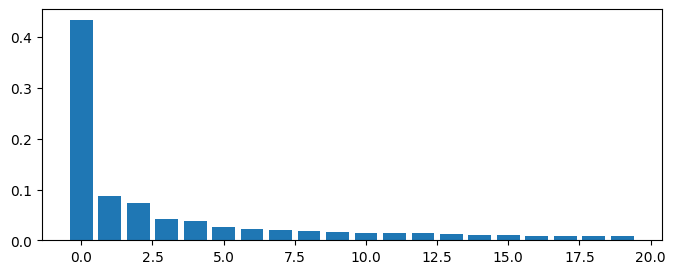

In [ ]:
plt.figure(figsize=(8, 3))
plt.bar(np.arange(num_factor_exposures), pca.explained_variance_ratio_)

## B. Factor Betas

Factor beta represents the sensitivity of each factor to the principal components obtained from PCA.

In [ ]:
def factor_betas(pca, factor_beta_indices, factor_beta_columns):
    factor_betas = pd.DataFrame(pca.components_.T, factor_beta_indices, factor_beta_columns)

    return factor_betas

risk_model = {}
risk_model['factor_betas'] = factor_betas(pca, returns.columns.values, np.arange(num_factor_exposures))

## C. Factor Returns

Factor returns show the real impact of these sensitivities on the portfolio's performance.

In [ ]:
def factor_returns(pca, returns, factor_return_indices, factor_return_columns):
    factor_returns = pd.DataFrame(pca.transform(returns), factor_return_indices, factor_return_columns)
    return factor_returns

risk_model['factor_returns'] = factor_returns(
    pca,
    returns,
    returns.index,
    np.arange(num_factor_exposures))

## D. Factor Covariance Matrix

In [ ]:
def factor_cov_matrix(factor_returns, ann_factor):
    factor_cov_matrix = np.var(factor_returns, ddof=1)
    factor_cov_matrix = np.diag(factor_cov_matrix) * ann_factor
    return factor_cov_matrix

ann_factor = 252 # Annualization factor
risk_model['factor_cov_matrix'] = factor_cov_matrix(risk_model['factor_returns'], ann_factor)

## E. Idiosyncratic Variance Matrix

It quantifies the asset-specific risk that is not explained by the common factors represented by `factor_returns` and `factor_betas`.

In [ ]:
def idiosyncratic_var_matrix(returns, factor_returns, factor_betas, ann_factor):
    dot_product = np.dot(factor_returns, factor_betas.T)
    common_return = pd.DataFrame(dot_product, returns.index, returns.columns)
    residual_return = returns - common_return

    idiosyncratic_var_matrix = pd.DataFrame(np.diag(np.var(residual_return)) * ann_factor, returns.columns, returns.columns)

    return idiosyncratic_var_matrix

risk_model['idiosyncratic_var_matrix'] = idiosyncratic_var_matrix(returns, risk_model['factor_returns'], risk_model['factor_betas'], ann_factor)

## F. Idiosyncratic Variance Vector

In [ ]:
def idiosyncratic_var_vector(returns, idiosyncratic_var_matrix):
    idiosyncratic_var_vector = pd.DataFrame(np.diagonal(idiosyncratic_var_matrix), returns.columns)

    return idiosyncratic_var_vector

risk_model['idiosyncratic_var_vector'] = idiosyncratic_var_vector(returns, risk_model['idiosyncratic_var_matrix'])

## G. Predict using the Risk Model

The function `predict_portfolio_risk` calculates the predicted risk of a portfolio by combining factor-based and idiosyncratic risks, outputting a single number that represents the standard deviation of portfolio returns, thus quantifying overall portfolio risk.

That is the formula to predict the portfolio risk $ \sqrt{X^{T}(BFB^{T} + S)X} $ where:
- $ X $ is the portfolio weights
- $ B $ is the factor betas
- $ F $ is the factor covariance matrix
- $ S $ is the idiosyncratic variance matrix

In [ ]:
def predict_portfolio_risk(factor_betas, factor_cov_matrix, idiosyncratic_var_matrix, weights):
    form_break_01 = np.dot(np.dot(factor_betas, factor_cov_matrix), factor_betas.T) + idiosyncratic_var_matrix # (BFB.T + S)
    form_break_02 = np.dot(np.dot(weights.T, form_break_01), weights) # (X.T(form_break_01)X)

    predicted_portfolio_risk = np.sqrt(form_break_02)

    return predicted_portfolio_risk[0][0]

all_weights = pd.DataFrame(np.repeat(1/len(ticker_list), len(ticker_list)), ticker_list)

predict_portfolio_risk(
    risk_model['factor_betas'],
    risk_model['factor_cov_matrix'],
    risk_model['idiosyncratic_var_matrix'],
    all_weights)

0.2104791932918607

# Part 3: Create Alpha Factors

In [ ]:
# Function to fetch sector information for a list of tickers
def fetch_sector_data(ticker_list):
    sector = {}
    for ticker in ticker_list:
        tickerdata = yf.Ticker(ticker)
        sector[ticker] = tickerdata.info.get('sector', 'Unknown')
    return sector

sectors_data = fetch_sector_data(ticker_list)
sectors_series = pd.Series(sectors_data)

## A. Mean Reversion 5 Day Sector Neutral Factor

In [ ]:
# Auxiliary function to calculate z-scores
def calculate_z_scores(demeaned):
    # Adding a small value to the standard deviation to avoid division by zero
    epsilon = 1e-7
    demeaned_std_aligned = demeaned.std(axis=1).to_frame(name='std')
    demeaned_std_aligned = pd.concat([demeaned_std_aligned] * demeaned.shape[1], axis=1)
    demeaned_std_aligned.columns = demeaned.columns
    demeaned_std_aligned += epsilon

    # Calculating z-scores
    demeaned_mean_aligned = demeaned.mean(axis=1).to_frame(name='mean')
    demeaned_mean_aligned = pd.concat([demeaned_mean_aligned] * demeaned.shape[1], axis=1)
    demeaned_mean_aligned.columns = demeaned.columns
    z_scored = (demeaned - demeaned_mean_aligned) / demeaned_std_aligned

    return z_scored

In [ ]:
# Function for 5-day sector neutral mean reversion
def calculate_mean_reversion_5day_sector_neutral(returns, sectors):
    # Aligning sectors with the return columns
    aligned_sectors = sectors_series.reindex(returns.columns)

    # Subtracting the sector mean from each return
    sector_means = returns.groupby(aligned_sectors, axis=1).transform('mean')
    demeaned = - returns.sub(sector_means)

    # Normalizing the results
    demeaned = demeaned.rank(axis=1)
    z_scored = calculate_z_scores(demeaned)

    # Converting to long format
    z_scored_long = z_scored.stack().reset_index()
    z_scored_long.columns = ['Date', 'Ticker', 'Mean_Reversion_5Day_Sector_Neutral']

    return z_scored_long

# Calculating 5-day returns
returns_5d = generate_returns(close, 5)

# Applying the function
mean_reversion_5day_sector_neutral = calculate_mean_reversion_5day_sector_neutral(returns_5d, sectors_series)

mean_reversion_5day_sector_neutral.set_index(['Date', 'Ticker'])

Mean_Reversion_5Day_Sector_Neutral
Date                      Ticker                                    
2018-01-09 00:00:00-05:00 AAPL                             -0.159280
                          ABBV                              0.159280
                          AMGN                             -0.796398
                          AMZN                             -1.035317
                          AXP                              -0.318559
...                                                              ...
2022-12-30 00:00:00-05:00 UNH                              -1.114957
                          V                                -0.079640
                          VZ                               -1.513156
                          WMT                               0.955677
                          XOM                               0.238919

[53922 rows x 1 columns]

## B. Mean Reversion 5 Day Sector Neutral Smoothed Factor

In [ ]:
# Function for smoothed 5-day sector neutral mean reversion
def calculate_mean_reversion_5day_sector_neutral_smoothed(factor_long):
    # Reconverting to wide format for smoothing
    factor_wide = factor_long.pivot(index='Date', columns='Ticker', values='Mean_Reversion_5Day_Sector_Neutral')

    # Smoothing using simple moving average
    smoothed = factor_wide.rolling(window=5).mean()

    # Normalizing the results again
    smoothed = smoothed.rank(axis=1)
    z_scored = calculate_z_scores(smoothed)

    # Converting to long format
    z_scored_long = z_scored.stack().reset_index()
    z_scored_long.columns = ['Date', 'Ticker', 'Mean_Reversion_5Day_Sector_Neutral_Smoothed']

    return z_scored_long

mean_reversion_5day_sector_neutral_smoothed = calculate_mean_reversion_5day_sector_neutral_smoothed(mean_reversion_5day_sector_neutral.reset_index())

mean_reversion_5day_sector_neutral_smoothed.set_index(['Date', 'Ticker'])

Mean_Reversion_5Day_Sector_Neutral_Smoothed
Date                      Ticker                                             
2018-01-16 00:00:00-05:00 AAPL                                      -0.477911
                          ABBV                                       0.318607
                          AMGN                                      -0.238955
                          AMZN                                      -1.513384
                          AXP                                        0.517737
...                                                                       ...
2022-12-30 00:00:00-05:00 UNH                                       -1.433516
                          V                                          0.000000
                          VZ                                        -1.672435
                          WMT                                        1.114957
                          XOM                                        0.637118

[53750 rows x 1 columns]

## C. Overnight Sentiment Factor

For this factor, were using the hypothesis from the paper Overnight Returns and Firm-Specific Investor Sentiment.

In [ ]:
# Function to calculate overnight returns
def calculate_overnight_returns(open_prices, close_prices):
    # Calculating the return from yesterday's close to today's open
    return (open_prices - close_prices.shift(1)) / close_prices.shift(1)

# Function to calculate trailing overnight returns
def calculate_overnight_sentiment(overnight_returns, window_length):
    # Calculating the rolling sum of overnight returns
    summed = overnight_returns.rolling(window=window_length).sum()

    # Normalizing the results by converting to z-score
    z_scored = calculate_z_scores(summed)

    # Converting back to long format
    z_scored_long = z_scored.stack().reset_index()
    z_scored_long.columns = ['Date', 'Ticker', 'Sum_Overnight_Sentiment_5Day']

    return z_scored_long

# Applying the functions
overnight_returns = calculate_overnight_returns(open, close)
overnight_sentiment = calculate_overnight_sentiment(overnight_returns, window_length=5)

overnight_sentiment.set_index(['Date', 'Ticker'])

Sum_Overnight_Sentiment_5Day
Date                      Ticker                              
2018-01-09 00:00:00-05:00 AAPL                       -0.150776
                          ABBV                       -0.110823
                          AMGN                        0.046796
                          AMZN                        0.781541
                          AXP                         0.369970
...                                                        ...
2022-12-30 00:00:00-05:00 UNH                         1.133277
                          V                          -0.522569
                          VZ                          0.358432
                          WMT                        -0.145291
                          XOM                         0.344908

[53922 rows x 1 columns]

## D. Overnight Sentiment Smoothed Factor

In [ ]:
def calculate_overnight_sentiment_smoothed(overnight_sentiment):
    # Reconverting to wide format for smoothing
    overnight_wide = overnight_sentiment.pivot(index='Date', columns='Ticker', values='Sum_Overnight_Sentiment_5Day')

    # Smoothing using simple moving average
    smoothed = overnight_wide.rolling(window=5).mean()

    # Normalizing the results again
    smoothed = smoothed.rank(axis=1)
    z_scored = calculate_z_scores(smoothed)

    # Converting to long format
    z_scored_long = z_scored.stack().reset_index()
    z_scored_long.columns = ['Date', 'Ticker', 'Sum_Overnight_Sentiment_5Day_Smoothed']

    return z_scored_long

overnight_sentiment_smoothed = calculate_overnight_sentiment_smoothed(overnight_sentiment.reset_index())

overnight_sentiment_smoothed.set_index(['Date', 'Ticker'])

Sum_Overnight_Sentiment_5Day_Smoothed
Date                      Ticker                                       
2018-01-16 00:00:00-05:00 AAPL                                -0.955677
                          ABBV                                -0.876038
                          AMGN                                -0.477839
                          AMZN                                 1.433516
                          AXP                                  0.477839
...                                                                 ...
2022-12-30 00:00:00-05:00 UNH                                  1.433516
                          V                                   -0.716758
                          VZ                                   0.637118
                          WMT                                 -0.318559
                          XOM                                  1.592796

[53750 rows x 1 columns]

## E. Combine the Factors

In [ ]:
from functools import reduce

# Create a list of all dataframes
dataframes = [mean_reversion_5day_sector_neutral,
              mean_reversion_5day_sector_neutral_smoothed,
              overnight_sentiment,
              overnight_sentiment_smoothed]

# Use 'reduce' to merge all dataframes into a single dataframe
all_factors = reduce(lambda left, right: pd.merge(left, right, on=['Date', 'Ticker'], how='inner'), dataframes)

# Readjust 'Date' and 'Ticker' as indices
all_factors = all_factors.set_index(['Date', 'Ticker'])

all_factors['Combined_Factors'] = all_factors.mean(axis=1)

all_factors

Mean_Reversion_5Day_Sector_Neutral  \
Date                      Ticker                                       
2018-01-16 00:00:00-05:00 AAPL                             -0.876038   
                          ABBV                             -0.398199   
                          AMGN                              0.398199   
                          AMZN                             -1.353876   
                          AXP                               1.114957   
...                                                              ...   
2022-12-30 00:00:00-05:00 UNH                              -1.114957   
                          V                                -0.079640   
                          VZ                               -1.513156   
                          WMT                               0.955677   
                          XOM                               0.238919   

                                  Mean_Reversion_5Day_Sector_Neutral_Smoothed  \
Date                      Ticker                                                
2018-01-16 00:00:00-05:00 AAPL                                      -0.477911   
                          ABBV                                       0.318607   
                          AMGN                                      -0.238955   
                          AMZN                                      -1.513384   
                          AXP                                        0.517737   
...                                                                       ...   
2022-12-30 00:00:00-05:00 UNH                                       -1.433516   
                          V                                          0.000000   
                          VZ                                        -1.672435   
                          WMT                                        1.114957   
                          XOM                                        0.637118   

                                  Sum_Overnight_Sentiment_5Day  \
Date                      Ticker                                 
2018-01-16 00:00:00-05:00 AAPL                       -0.157590   
                          ABBV                       -0.734870   
                          AMGN                       -0.519650   
                          AMZN                        0.684260   
                          AXP                         0.478046   
...                                                        ...   
2022-12-30 00:00:00-05:00 UNH                         1.133277   
                          V                          -0.522569   
                          VZ                          0.358432   
                          WMT                        -0.145291   
                          XOM                         0.344908   

                                  Sum_Overnight_Sentiment_5Day_Smoothed  \
Date                      Ticker                                          
2018-01-16 00:00:00-05:00 AAPL                                -0.955677   
                          ABBV                                -0.876038   
                          AMGN                                -0.477839   
                          AMZN                                 1.433516   
                          AXP                                  0.477839   
...                                                                 ...   
2022-12-30 00:00:00-05:00 UNH                                  1.433516   
                          V                                   -0.716758   
                          VZ                                   0.637118   
                          WMT                                 -0.318559   
                          XOM                                  1.592796   

                                  Combined_Factors  
Date                      Ticker                    
2018-01-16 00:00:00-05:00 AAPL           -0.616804  
                          ABBV           -0.42262

# Part 4: Evaluate Alpha Factors

## A. Factor Returns

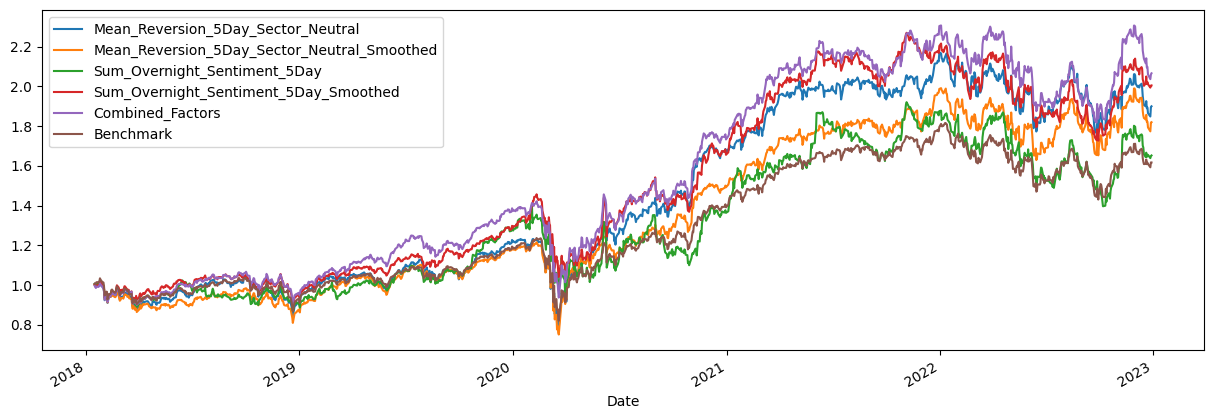

In [ ]:
# Calculate forward returns and align with factor data dates
forward_returns = generate_returns(close, 1).shift(-1).reset_index()
forward_returns = forward_returns.loc[forward_returns['Date'].isin(set(all_factors.reset_index().Date))].set_index('Date')
forward_returns = forward_returns.stack().reset_index()
forward_returns.columns = ['Date', 'Ticker', 'Returns']
forward_returns.set_index(['Date', 'Ticker'], inplace=True)

def calculate_allocation(df):
    df[df < 0] = 0
    return df.groupby(level=0, group_keys=False).apply(lambda x: x / x.sum())

# Calculate allocations and combine with forward returns
allocation = all_factors.copy()
allocation = calculate_allocation(allocation)
strategy_returns = allocation.reset_index().merge(forward_returns.reset_index(), on=['Date', 'Ticker']).set_index(['Date', 'Ticker'])

# Apply allocation weights to returns
strategy_returns.update(strategy_returns.drop(columns='Returns').mul(strategy_returns['Returns'], axis=0))

# Calculate strategy and benchmark returns
mean_returns = strategy_returns[['Returns']].groupby(level=0, group_keys=False).apply(lambda x: x.mean())
strategy_returns = strategy_returns.drop(columns='Returns').groupby(level=0, group_keys=False).apply(lambda x: x.sum())
strategy_returns['Benchmark'] = mean_returns

# Plot cumulative returns
(1 + strategy_returns).cumprod().plot(figsize=(15, 5))
plt.show()

## B. Correlation Analysis

The purpose of this analysis is to understand how your alpha factors are related to each other. If they are highly correlated, they might be capturing similar market information.

In [ ]:
# Calculate the correlation matrix for alpha factors
correlation_matrix = all_factors.corr()
correlation_matrix.style.background_gradient(cmap='RdBu')

,Mean_Reversion_5Day_Sector_Neutral,Mean_Reversion_5Day_Sector_Neutral_Smoothed,Sum_Overnight_Sentiment_5Day,Sum_Overnight_Sentiment_5Day_Smoothed,Combined_Factors
Mean_Reversion_5Day_Sector_Neutral,1.000000,0.687225,-0.363413,-0.239843,0.523113
Mean_Reversion_5Day_Sector_Neutral_Smoothed,0.687225,1.000000,-0.257609,-0.325338,0.532913
Sum_Overnight_Sentiment_5Day,-0.363413,-0.257609,1.000000,0.645900,0.494592
Sum_Overnight_Sentiment_5Day_Smoothed,-0.239843,-0.325338,0.645900,1.000000,0.521541
Combined_Factors,0.523113,0.532913,0.494592,0.521541,1.000000


## C. Drawdown Analysis

Drawdown analysis involves understanding the declines from a peak in the cumulative returns of your strategy.

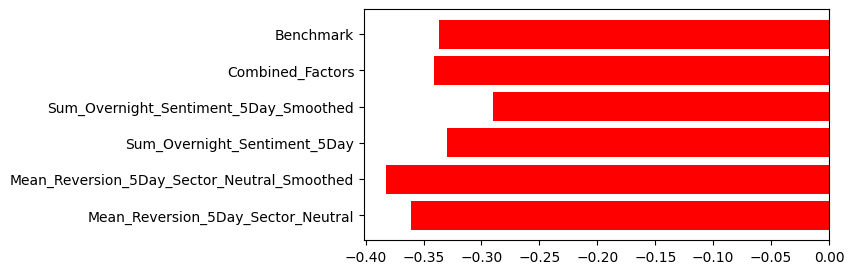

In [ ]:
# Calculate cumulative returns
cumulative_returns = (1 + strategy_returns).cumprod()

# Calculate drawdown
peak = cumulative_returns.expanding(min_periods=1).max()
drawdown = (cumulative_returns - peak) / peak

plt.figure(figsize=(6, 3))
plt.barh(drawdown.min().index, drawdown.min(), color='red')
plt.show()

## D. Return to Volatility Ratio

This ratio is often used to assess the risk-adjusted return of an investment strategy.

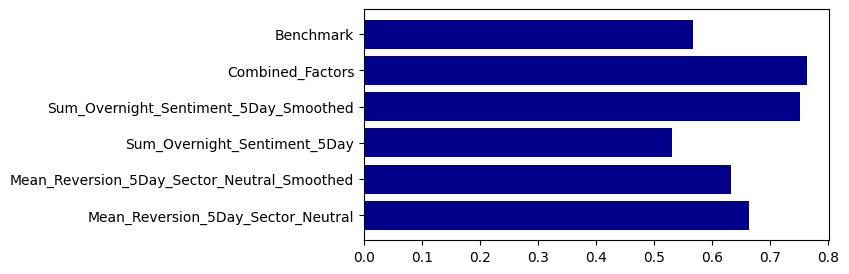

In [ ]:
# Calculate annualized return
annualized_return = strategy_returns.mean() * 252

# Calculate annualized volatility
annualized_volatility = strategy_returns.std() * np.sqrt(252)

# Return to volatility ratio
return_to_volatility_ratio = annualized_return / annualized_volatility

plt.figure(figsize=(6, 3))
plt.barh(return_to_volatility_ratio.index, return_to_volatility_ratio, color='darkblue')
plt.show()